In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("laptop_data.csv")

## Initial Analysis

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.duplicated().sum()

29

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


## EDA

In [8]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float64','float32']).columns

In [9]:
df.nunique()

Company              19
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              179
Price               791
dtype: int64

In [10]:
def uniquevals(col):
    print(f"Details of {col} is: {df[col].unique()}")
def valuecounts(col):
    print(f"Value count of {col} is: {df[col].value_counts().sum()}")

In [11]:
for i in catvars:
    uniquevals(i)
    print("-"*75)

Details of Company is: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of TypeName is: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of ScreenResolution is: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840

In [12]:
for i in numvars:
    valuecounts(i)

Value count of Inches is: 1303
Value count of Price is: 1303


In [13]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [14]:
df["Ram"] = df["Ram"].str.replace("GB","")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [16]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [18]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float64','float32']).columns

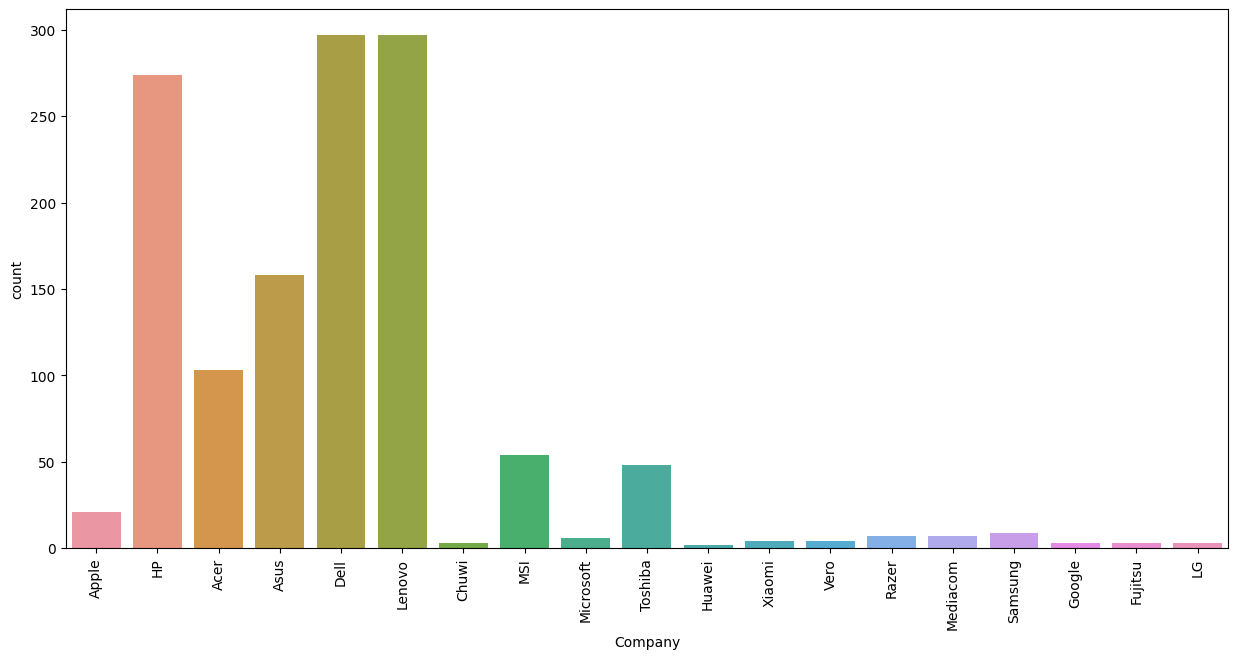

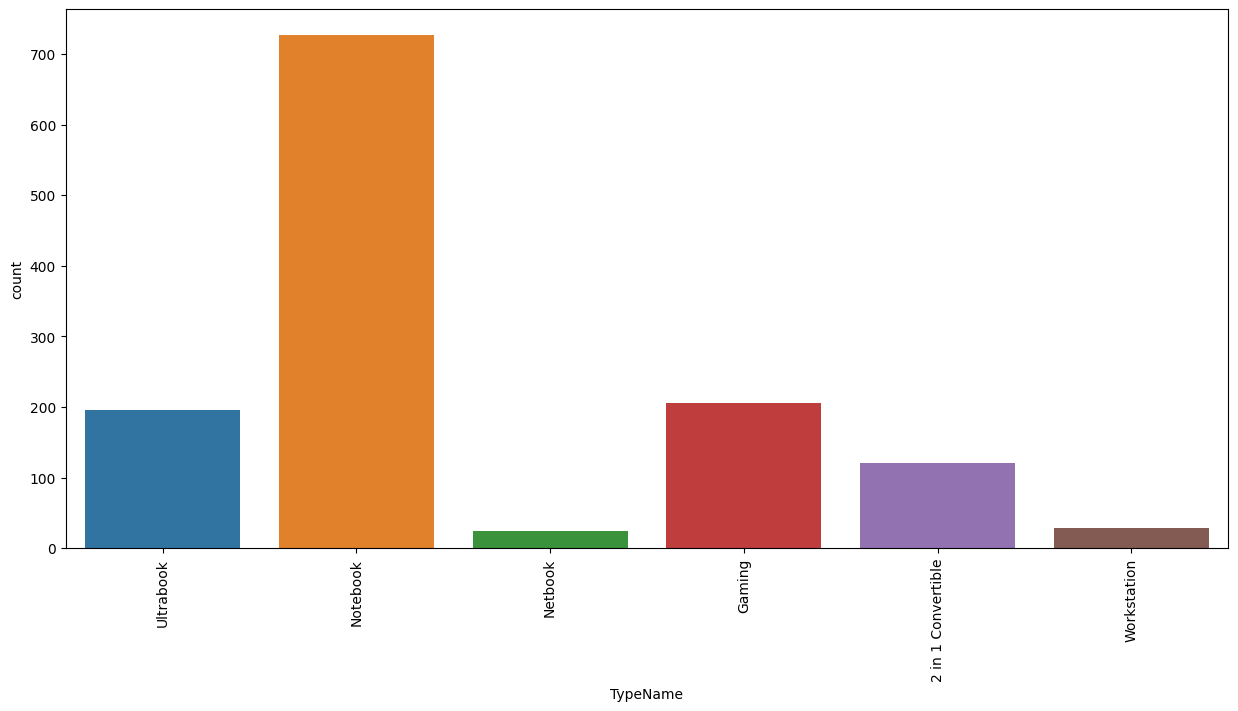

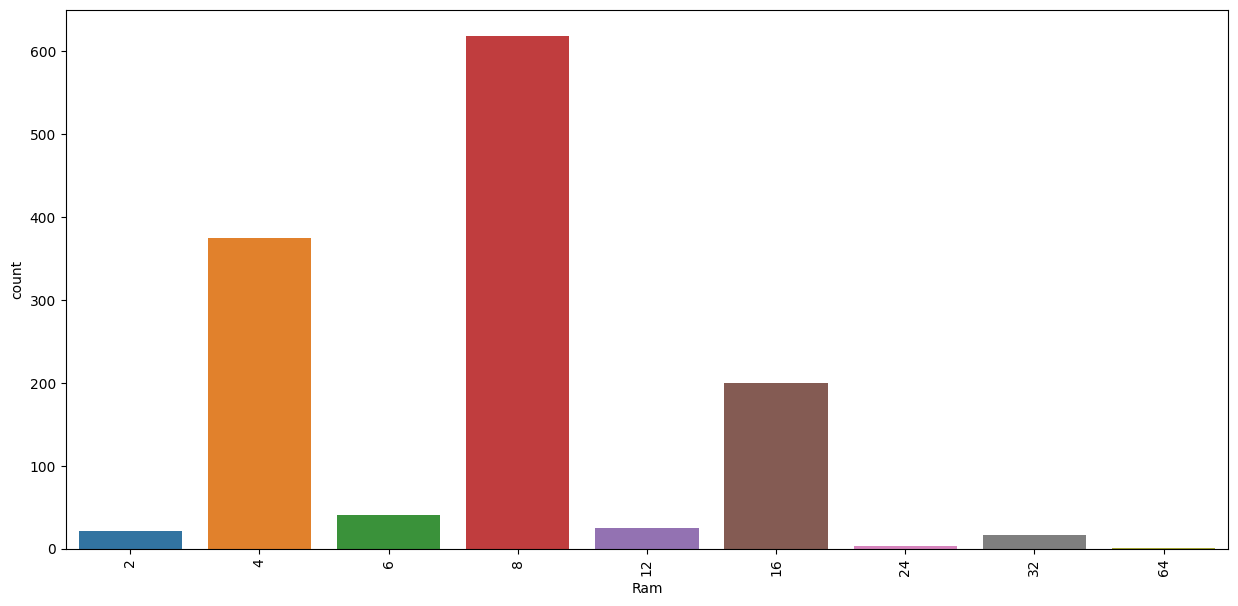

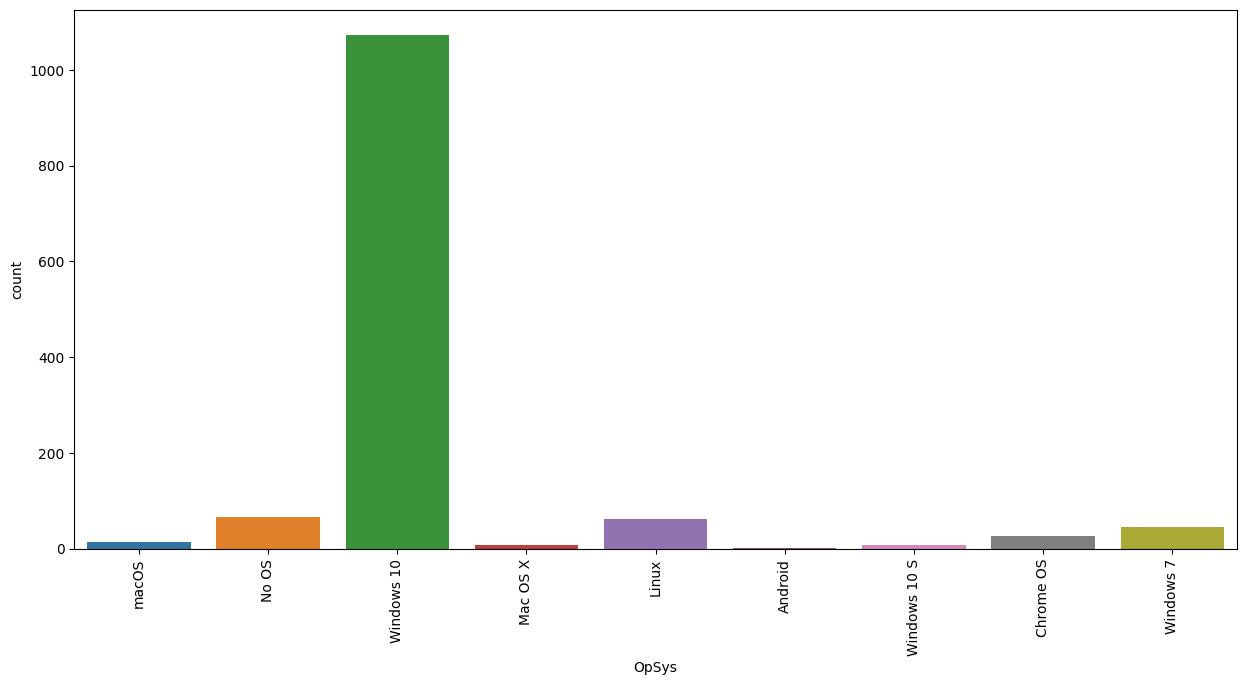

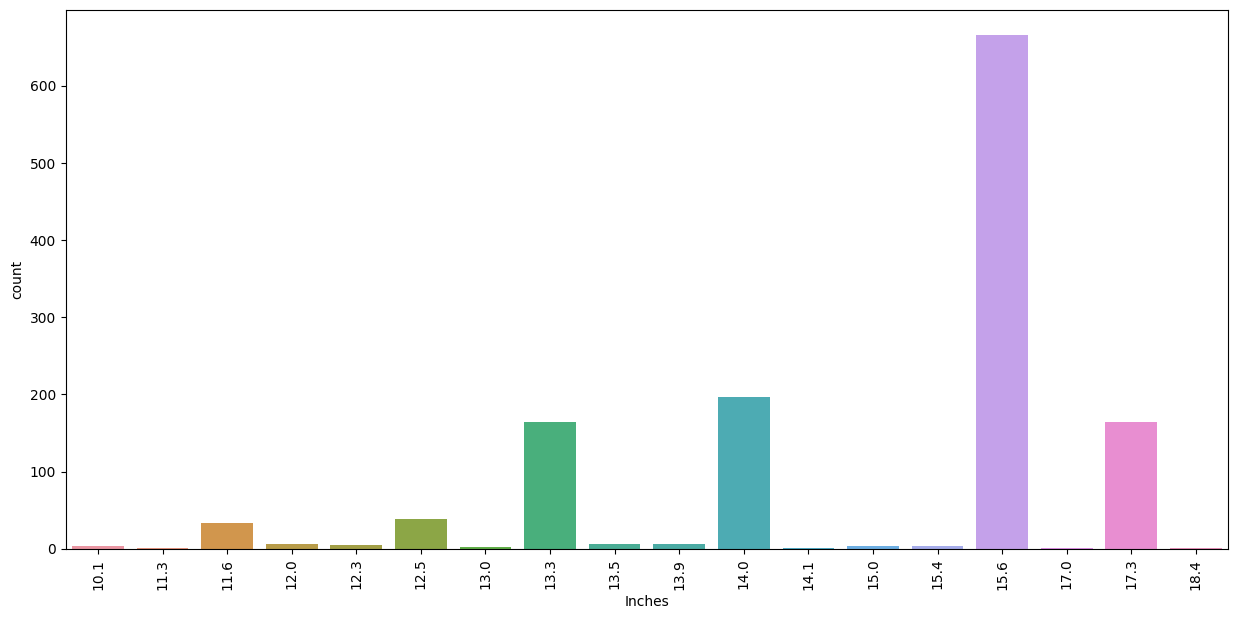

In [19]:
def countplot(x):
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[x])
    plt.xticks(rotation="vertical");
var=["Company","TypeName","Ram","OpSys","Inches"]
for i in var:
    countplot(i)

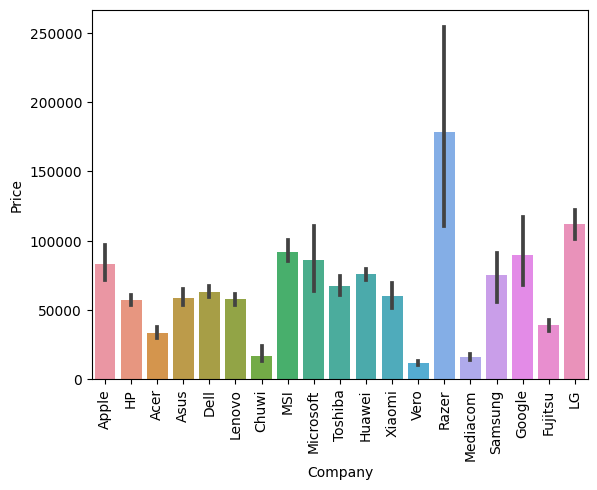

In [20]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical");

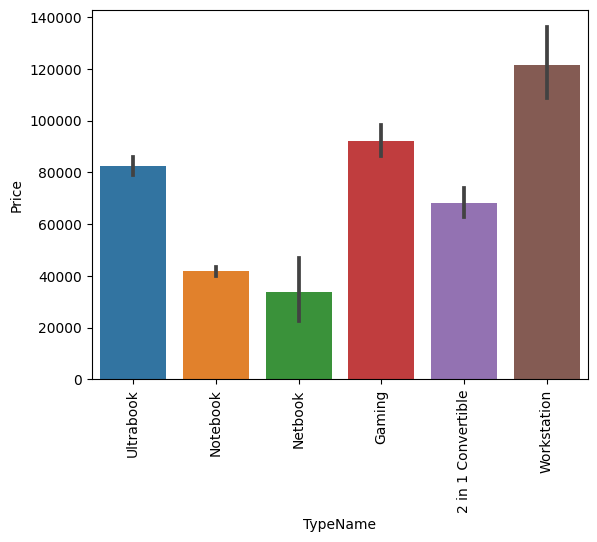

In [21]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical");

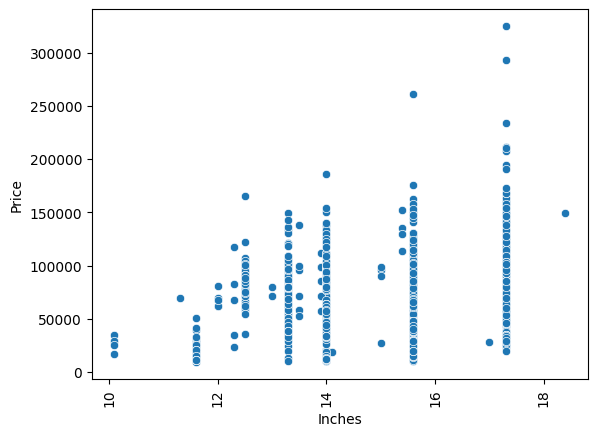

In [22]:
sns.scatterplot(x=df["Inches"],y=df["Price"])
plt.xticks(rotation="vertical");

## Screen Resolution column

In [23]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [24]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [25]:
df.Touchscreen.value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

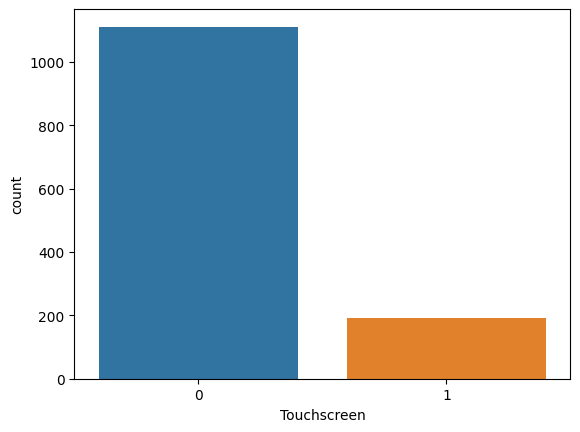

In [26]:
sns.countplot(x=df["Touchscreen"]);

<Axes: xlabel='Touchscreen', ylabel='Price'>

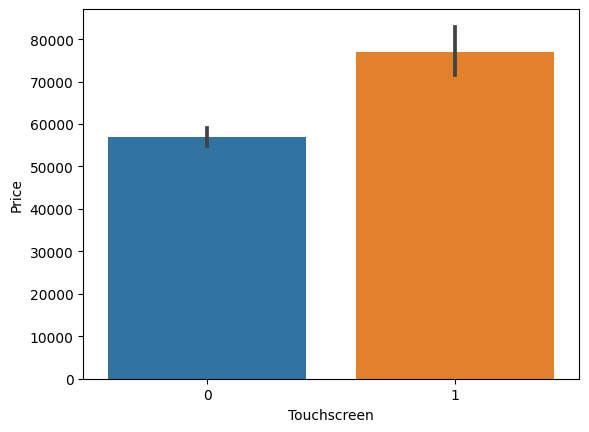

In [27]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [28]:
df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

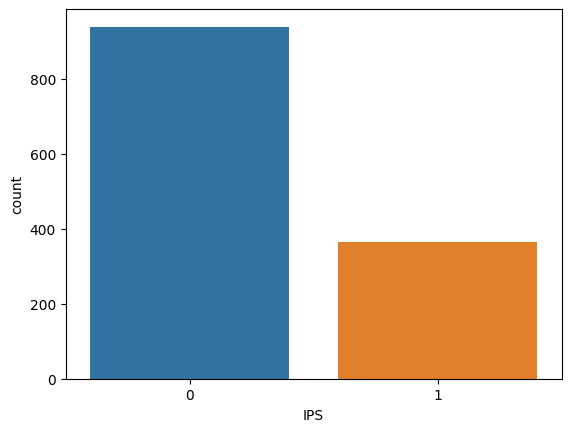

In [29]:
sns.countplot(x=df["IPS"]);

<Axes: xlabel='IPS', ylabel='Price'>

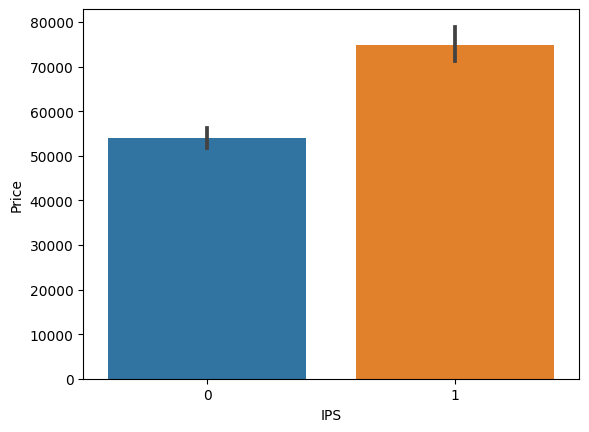

In [30]:
sns.barplot(x=df["IPS"],y=df["Price"])

In [31]:
splitdf = df["ScreenResolution"].str.split("x",n=1,expand=True)

In [32]:
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [33]:
df["x_res"] = splitdf[0]
df["y_res"] = splitdf[1]

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [35]:
df["x_res"] = df["x_res"].str.replace(","," ").str.findall(r"(\d+\.?\d+)").apply(lambda x:x[0])

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [37]:
df["x_res"] = df["x_res"].astype("int")
df["y_res"] = df["y_res"].astype("int")

<Axes: >

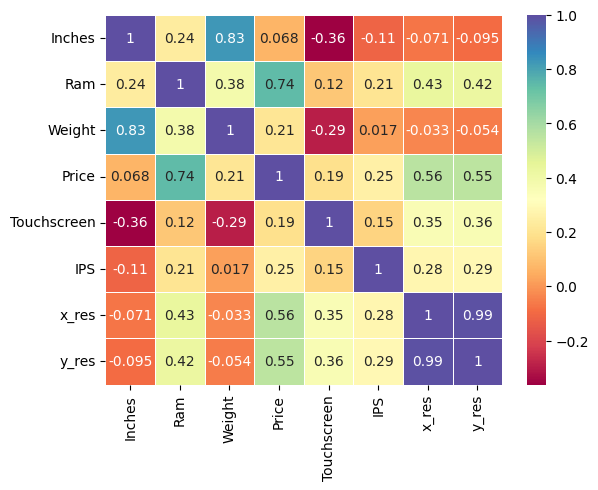

In [38]:
sns.heatmap(df.corr(numeric_only=True),cmap="Spectral",annot=True,lw=0.5)

In [39]:
df.corr(numeric_only=True)["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [40]:
df["PPI"] = ((df["x_res"]**2+df["y_res"]**2)**0.5/df["Inches"]).astype("float")

In [41]:
df.corr(numeric_only=True)["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [42]:
df.drop(["Inches","x_res","y_res"],axis=1,inplace=True)

In [43]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


## CPU column

In [44]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [45]:
text="Intel Core i5 7200U 2.5GHz"


In [46]:
" ".join(text.split()[:3])

'Intel Core i5'

In [47]:
df["cpu_name"] = df["Cpu"].apply(lambda text:" ".join(text.split()[:3]))

In [48]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [49]:
df.cpu_name.value_counts()

cpu_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [50]:
def processor_type(text):
    if text =="Intel Core i7" or text =="Intel Core i5" or text =="Intel Core i3":
        return text
    elif text.split()[0] == "Intel":
        return "other intel processor"
    else:
        return "AMD processor"

In [51]:
df["cpu_name"] = df["cpu_name"].apply(processor_type)

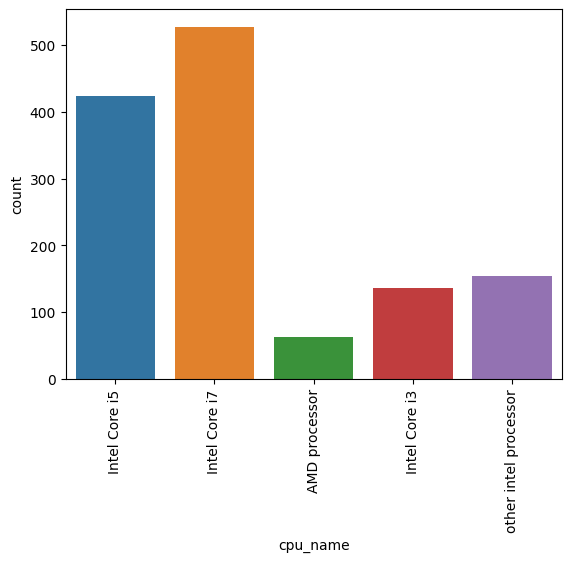

In [52]:
sns.countplot(x=df["cpu_name"])
plt.xticks(rotation = "vertical");

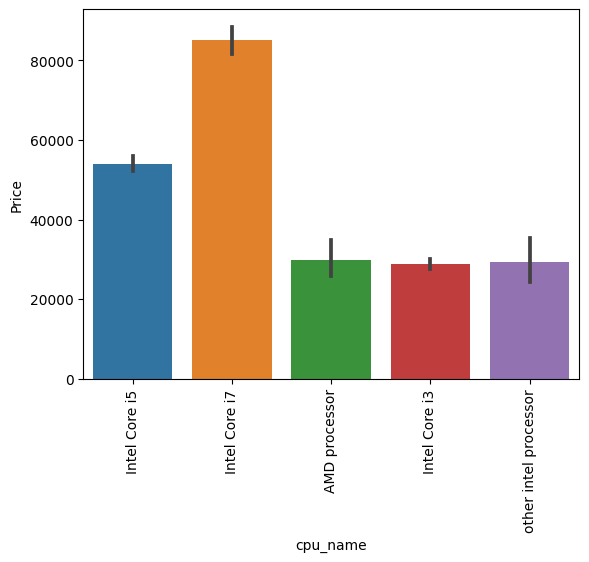

In [53]:
sns.barplot(x=df["cpu_name"],y=df["Price"])
plt.xticks(rotation = "vertical");

In [54]:
df.drop("Cpu",axis=1,inplace=True)

In [55]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram', ylabel='count'>

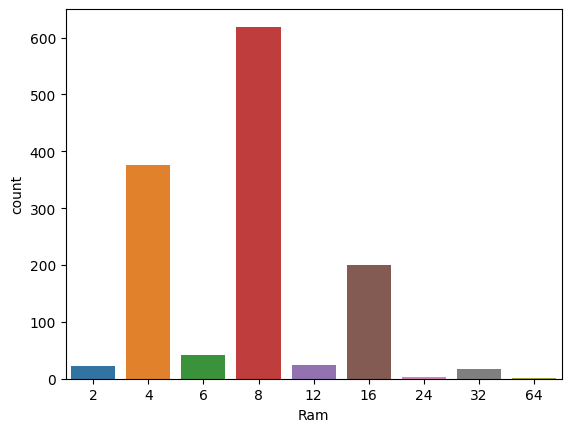

In [56]:
sns.countplot(x=df["Ram"])

<Axes: xlabel='Ram', ylabel='Price'>

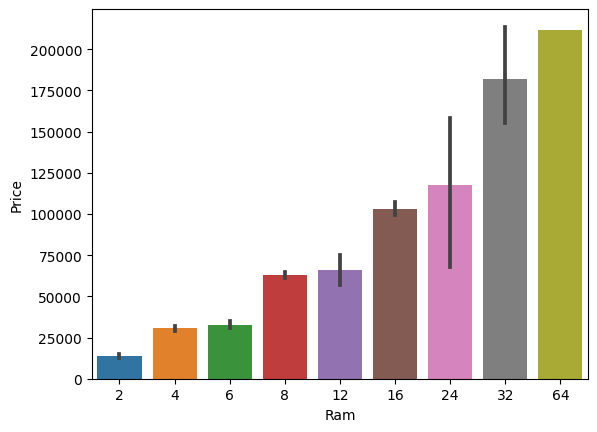

In [57]:
sns.barplot(x=df["Ram"],y=df["Price"])

## Memory column

In [58]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [59]:
df["Memory"] = df["Memory"].astype(str).replace("\.0","",regex=True)

In [60]:
df["Memory"] = df["Memory"].str.replace("GB","")

In [61]:
df["Memory"] = df["Memory"].str.replace("TB","000")

In [62]:
newdf=df["Memory"].str.split("+",n=1,expand=True)

In [63]:
newdf.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [64]:
df["first"] = newdf[0]
df["first"] = df["first"].str.strip()

In [65]:
def new_filter(value):
    df["Layer1"+value] = df["first"].apply(lambda x:1 if value in x else 0)
list = ["SSD","HDD","Flash Storage","Hybrid"]
for value in list:
    new_filter(value)

In [66]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,first,Layer1SSD,Layer1HDD,Layer1Flash Storage,Layer1Hybrid
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,1,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,1,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,1,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,1,0,0,0


In [67]:
df['first'] = df["first"].str.extract('(\d+)')
df["first"].value_counts()

first
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [68]:
df["second"] = newdf[1]

In [69]:
df["second"] = df["second"].str.strip()

In [70]:
df["second"]=df["second"].fillna(0)

In [71]:
df["second"].value_counts()

second
0              1095
1000 HDD        185
2000 HDD         15
256 SSD           3
500 HDD           2
1000 Hybrid       2
512 SSD           1
Name: count, dtype: int64

In [72]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,first,Layer1SSD,Layer1HDD,Layer1Flash Storage,Layer1Hybrid,second
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,1,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,1,0,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,1,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,1,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,1,0,0,0,0


In [73]:
df["second"]=df["second"].astype("str")

In [74]:
def new_filter1(value):
    df["Layer2"+value] = df["second"].apply(lambda x:1 if value in x else 0)
list1 = ["SSD","HDD","Flash Storage","Hybrid"]
for value in list1:
    new_filter1(value)

In [75]:
df['second'] = df["second"].str.extract('(\d+)')
df["second"].value_counts()

second
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [76]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1SSD,Layer1HDD,Layer1Flash Storage,Layer1Hybrid,second,Layer2SSD,Layer2HDD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,1,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,1,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,1,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,1,0,0,0,0,0,0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   ScreenResolution     1303 non-null   object 
 3   Ram                  1303 non-null   int32  
 4   Memory               1303 non-null   object 
 5   Gpu                  1303 non-null   object 
 6   OpSys                1303 non-null   object 
 7   Weight               1303 non-null   float32
 8   Price                1303 non-null   float64
 9   Touchscreen          1303 non-null   int64  
 10  IPS                  1303 non-null   int64  
 11  PPI                  1303 non-null   float64
 12  cpu_name             1303 non-null   object 
 13  first                1303 non-null   object 
 14  Layer1SSD            1303 non-null   int64  
 15  Layer1HDD            1303 non-null   i

In [78]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [79]:
df["HDD"] = (df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Flash Storage"] = (df["first"]*df["Layer1Flash Storage"]+df["second"]*df["Layer2Flash Storage"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])

In [80]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,Layer1Hybrid,second,Layer2SSD,Layer2HDD,Layer2Flash Storage,Layer2Hybrid,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,0,0,0,0,0,0,0,0,128,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,0,0,0,0,0,0,0,256,0,0


In [81]:
df.drop(["first","Layer1SSD","Layer1HDD","Layer1Flash Storage","Layer1Hybrid","second","Layer2SSD","Layer2HDD","Layer2Flash Storage","Layer2Hybrid"],axis=1,inplace=True)

In [82]:
df.corr(numeric_only=True)["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Flash Storage   -0.040511
Hybrid           0.007989
Name: Price, dtype: float64

In [83]:
df.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


## CPU column

In [84]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [85]:
df["Gpu_brand"] = df["Gpu"].apply(lambda x:x.split()[0])

<Axes: xlabel='Gpu_brand', ylabel='count'>

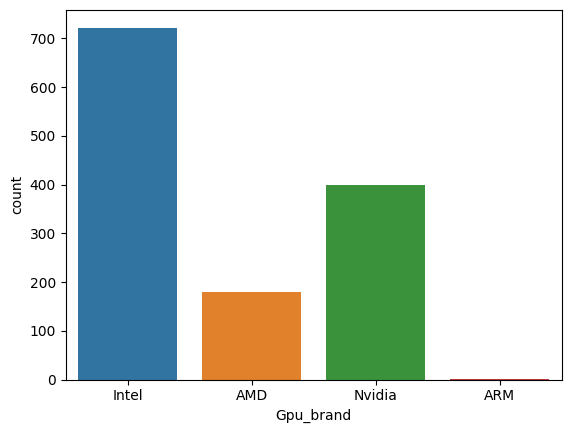

In [86]:
sns.countplot(x=df["Gpu_brand"])

In [87]:
df = df[df["Gpu_brand"] != "ARM"]


<Axes: xlabel='Gpu_brand', ylabel='count'>

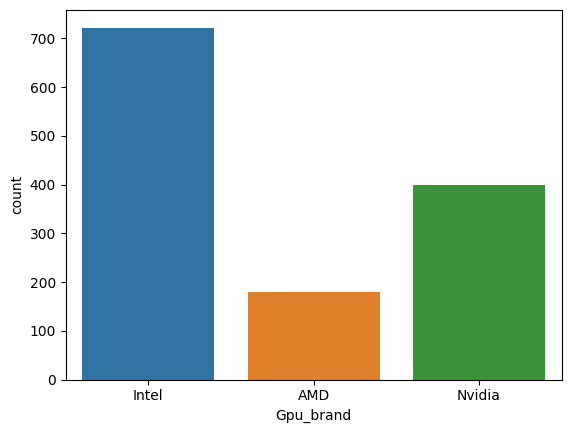

In [88]:
sns.countplot(x=df["Gpu_brand"])

<Axes: xlabel='Gpu_brand', ylabel='Price'>

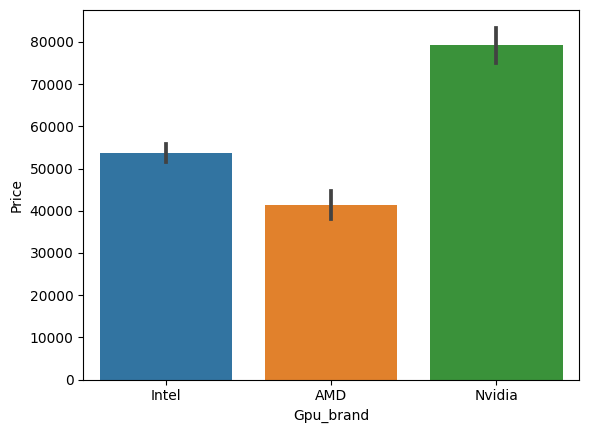

In [89]:
sns.barplot(x=df["Gpu_brand"],y=df["Price"])

In [90]:
df = df.drop("Gpu",axis=1)

## operating system column

In [91]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [92]:
def sort1(value):
    if value == "Windows 10" or value == "Windows 7" or value == "Windows 10 S":
        return "windows"
    elif value =="macOS" or value =="Mac OS X":
        return "Mac"
    else:
        return "others"


In [93]:
df["OpSys"]=df["OpSys"].apply(sort1)

<Axes: xlabel='OpSys', ylabel='count'>

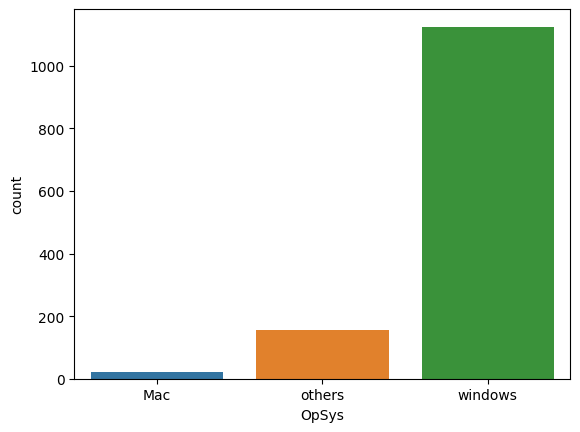

In [94]:
sns.countplot(x=df["OpSys"])

<Axes: xlabel='OpSys', ylabel='Price'>

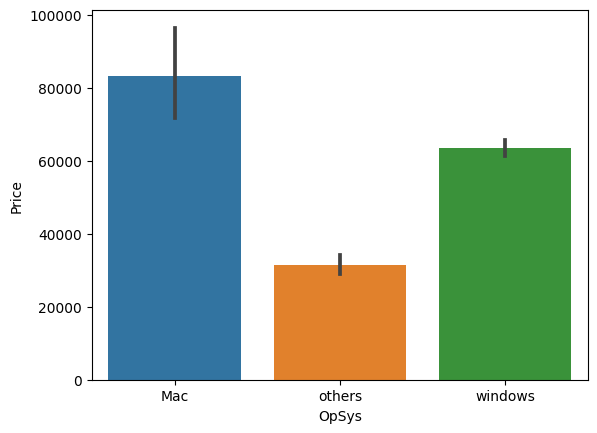

In [95]:
sns.barplot(x=df["OpSys"],y=df["Price"])

weight analysis

C:\Users\rahul\AppData\Local\Temp\ipykernel_18140\1474661312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Weight"])


<Axes: ylabel='Density'>

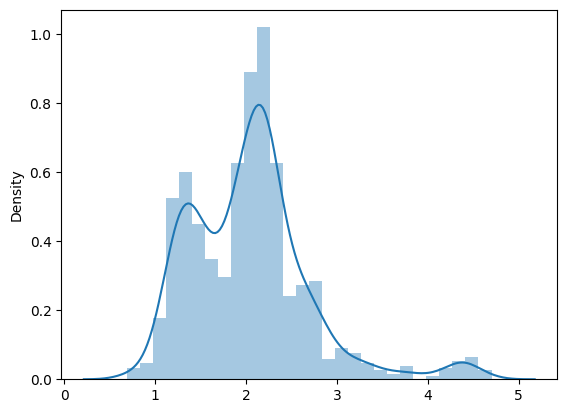

In [96]:
sns.distplot(x=df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

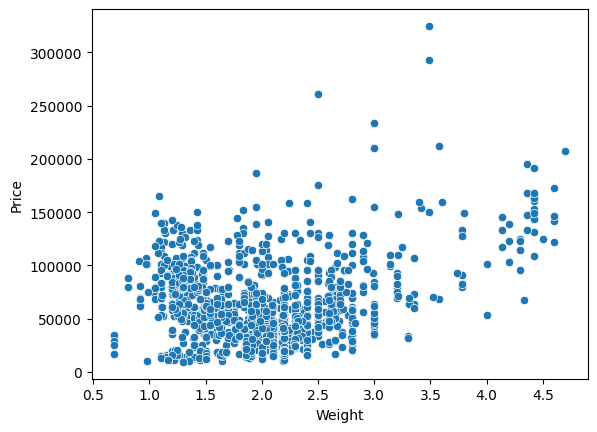

In [97]:
sns.scatterplot(x=df["Weight"],y=df["Price"])

Price Analysis

C:\Users\rahul\AppData\Local\Temp\ipykernel_18140\3006050737.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Price"])


<Axes: ylabel='Density'>

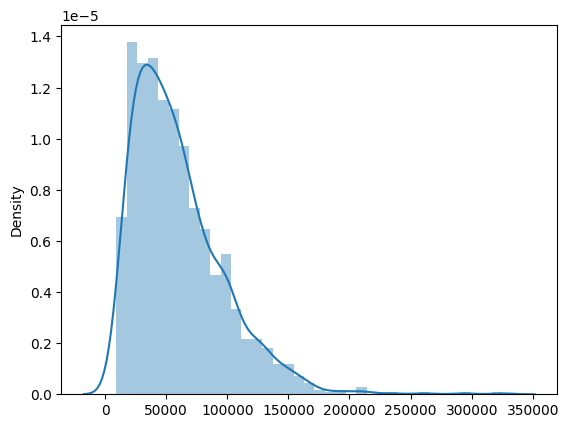

In [98]:
sns.distplot(x=df["Price"])

C:\Users\rahul\AppData\Local\Temp\ipykernel_18140\4008791138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=np.log(df["Price"]))


<Axes: ylabel='Density'>

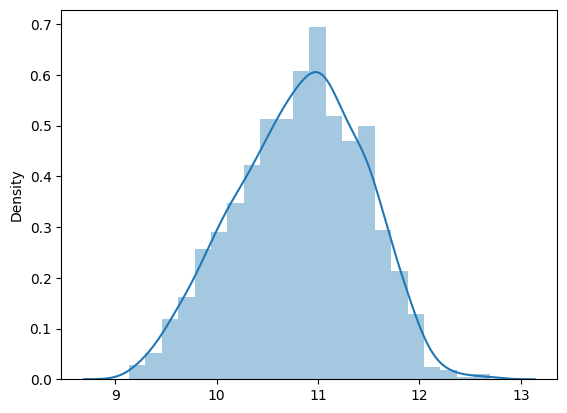

In [99]:
sns.distplot(x=np.log(df["Price"]))

In [100]:
df.drop("Flash Storage",axis=1,inplace=True)

<Axes: >

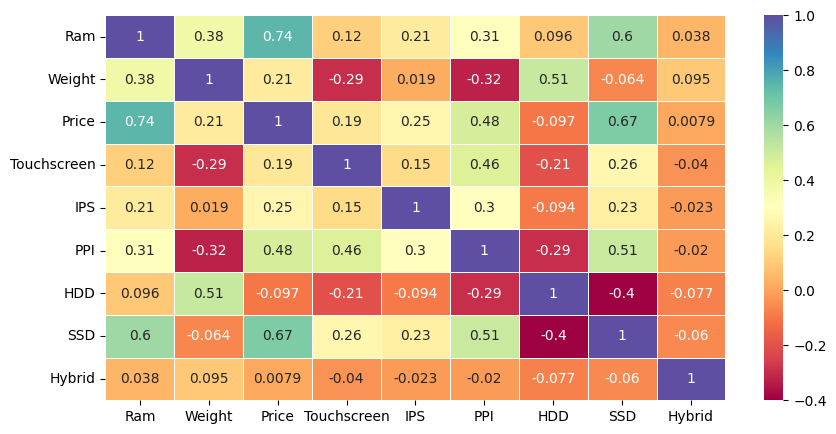

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),cmap="Spectral",annot=True,lw=0.5)

## Preparing for Machine Learning Model

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
df = pd.get_dummies(df,drop_first=True)

In [104]:
x = df.drop("Price",axis = 1)
y = df["Price"]

In [105]:
x.head()

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Company_Apple,Company_Asus,...,Memory_64 SSD,Memory_8 SSD,OpSys_others,OpSys_windows,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_other intel processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,0,True,False,...,False,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.677940,0,0,0,True,False,...,False,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.211998,0,256,0,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534624,0,512,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.983005,0,256,0,True,False,...,False,False,False,False,False,True,False,False,True,False


In [106]:
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

## Linear Regression Model

In [108]:
from sklearn.linear_model import LinearRegression

In [110]:
model1 = LinearRegression()

In [111]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [112]:
ypred = model1.predict(xtest)

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [114]:
def evaluation_metrics(actual,pred):
    MAE = mean_absolute_error(actual,pred)
    MSE = mean_squared_error(actual,pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    score  = r2_score(actual,pred)
    print("r2_score:",score,"\n","Mean Squared Error:",MSE,"\n","Root Mean Squared Error:",RMSE,"\n","Mean Absolute Error:",MAE)

In [115]:
evaluation_metrics(ytest,ypred)

r2_score: 0.7392632417670735 
 Mean Squared Error: 375729114.82651997 
 Root Mean Squared Error: 19383.733253078983 
 Mean Absolute Error: 13272.66843228275


## Random Forest Regressor Model

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
model2 = RandomForestRegressor(random_state=46)

In [135]:
model2.fit(xtrain,ytrain)

RandomForestRegressor(random_state=46)

In [136]:
ypred = model2.predict(xtest)

In [137]:
evaluation_metrics(ytest,ypred)

r2_score: 0.8308387271947013 
 Mean Squared Error: 243766225.08009666 
 Root Mean Squared Error: 15613.0146057735 
 Mean Absolute Error: 10768.099832302913
